In [17]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def as_html(model, results):
    rendered = model.render_html(results)    
    return HTML(rendered)

def results_for_spec(spec, rounds):
    model = parse(spec)
    results = model.run(rounds=rounds)
    return model, results


def chart(title, xlabel, ylabel, keys, named_results):
    named_lines = {}
    for name, results in named_results.items():
        for key in keys:
            line_name = key
            if name:
                line_name = name + " " + line_name            
            named_lines[line_name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


def multi_result_chart(title, xlabel, ylabel, key, named_results):
    named_lines = {}
    for name, results in named_results.items():
        named_lines[name] = [x[key] for x in results]

    fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if len(named_lines) == 1:
        line = list(named_lines.values())[0]
        ax.plot(line)
        return ax
    else:
        for name, line in named_lines.items():
            ax.plot(line, label=name)
        ax.legend()
        return ax


In [19]:
spec = """
HiringRate(2)

[Candidates] > SWE1(10) @ HiringRate
SWE1 > DepartedSWE1 @ Leak(0.1)
DepartedSWE1 > SWE1 @ Leak(0.5)

Candidates > SWE2(10) @ HiringRate
SWE1 > SWE2 @ Leak(0.1)
SWE2 > DepartedSWE2 @ Leak(0.1)
DepartedSWE2 > SWE2 @ Leak(0.5)

Candidates > SWE3(10) @ HiringRate
SWE2 > SWE3 @ Leak(0.1)
SWE3 > DepartedSWE3 @ Leak(0.1)
DepartedSWE3 > SWE3 @ Leak(0.5)

Candidates > SWE4(0)  @ HiringRate
SWE3 > SWE4 @ Leak(0.1)
SWE4 > DepartedSWE4 @ Leak(0.1)
DepartedSWE4 > SWE4 @ Leak(0.5)
"""
model1, results1 = results_for_spec(spec, 50)

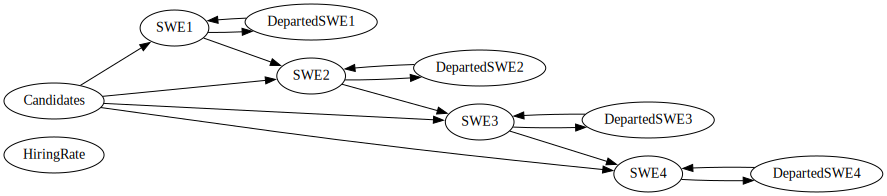

In [20]:
as_dot(model1)

<Axes: title={'center': 'SWEs Over Time'}, xlabel='Time', ylabel='# SWEs'>

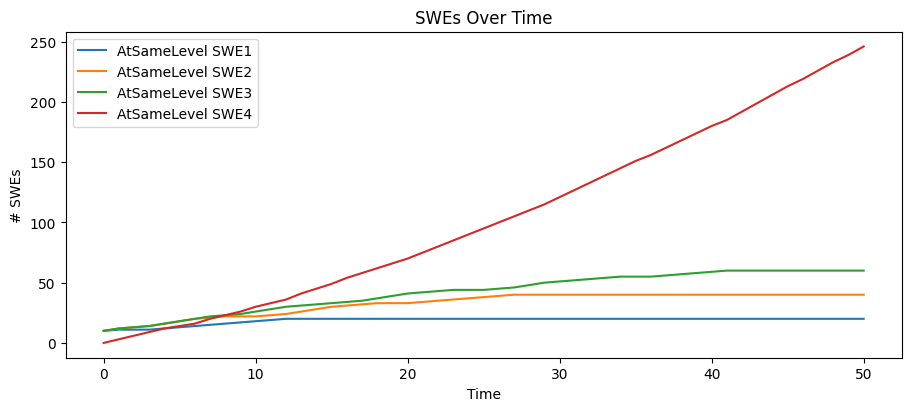

In [26]:
combined1 = {'AtSameLevel': results1 }
chart('SWEs Over Time', 'Time', '# SWEs', ['SWE1', 'SWE2', 'SWE3', 'SWE4'], combined1)

<Axes: title={'center': 'SWEs Over Time'}, xlabel='Time', ylabel='# SWEs'>

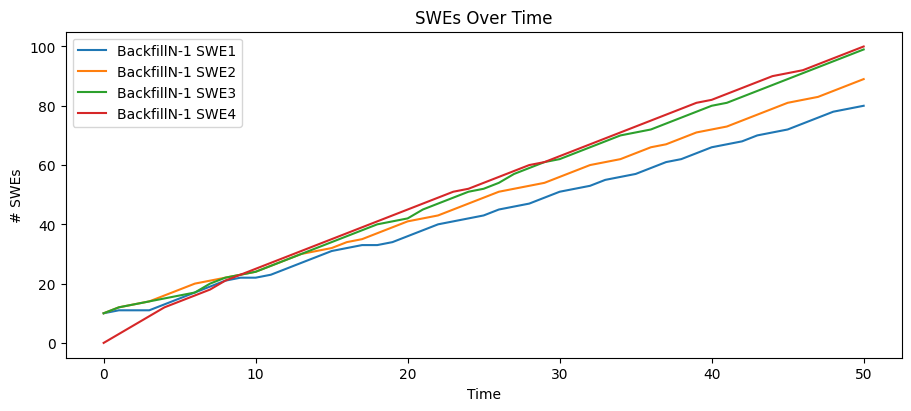

In [25]:
spec2 = """
HiringRate(2)

[Candidates] > SWE1(10) @ HiringRate
SWE1 > DepartedSWE1 @ Leak(0.1)
DepartedSWE1 > SWE1 @ Leak(0.5)

Candidates > SWE2(10) @ HiringRate
SWE1 > SWE2 @ Leak(0.1)
SWE2 > DepartedSWE2 @ Leak(0.1)
DepartedSWE2 > SWE1 @ Leak(0.5)

Candidates > SWE3(10) @ HiringRate
SWE2 > SWE3 @ Leak(0.1)
SWE3 > DepartedSWE3 @ Leak(0.1)
DepartedSWE3 > SWE2 @ Leak(0.5)

Candidates > SWE4(0)  @ HiringRate
SWE3 > SWE4 @ Leak(0.1)
SWE4 > DepartedSWE4 @ Leak(0.1)
DepartedSWE4 > SWE3 @ Leak(0.5)
"""

model2, results2 = results_for_spec(spec2, 50)
#combined1 = {'AtSameLevel': results1, 'BackfillN-1': results2 }
combined1 = {'BackfillN-1': results2 }
chart('SWEs Over Time', 'Time', '# SWEs', ['SWE1', 'SWE2', 'SWE3', 'SWE4'], combined1)

<Axes: title={'center': 'SWEs Over Time'}, xlabel='Time', ylabel='# SWEs'>

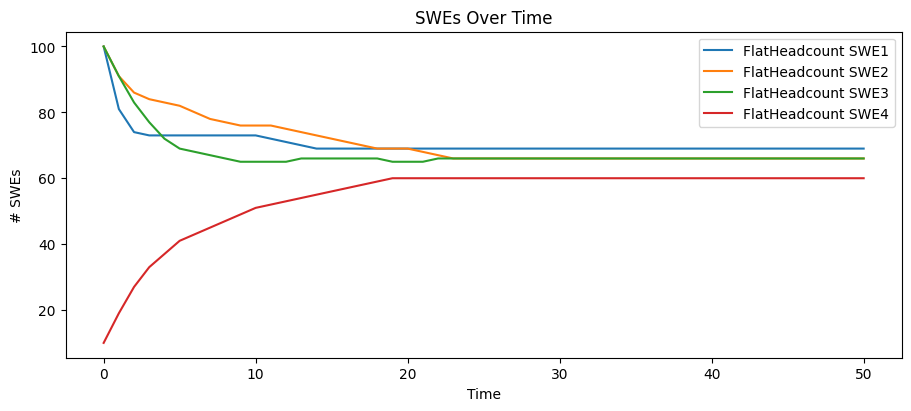

In [28]:
spec3 = """
HiringRate(0)

[Candidates] > SWE1(100) @ HiringRate
SWE1 > DepartedSWE1 @ Leak(0.1)
DepartedSWE1 > SWE1 @ Leak(0.5)

Candidates > SWE2(100) @ HiringRate
SWE1 > SWE2 @ Leak(0.1)
SWE2 > DepartedSWE2 @ Leak(0.1)
DepartedSWE2 > SWE1 @ Leak(0.5)

Candidates > SWE3(100) @ HiringRate
SWE2 > SWE3 @ Leak(0.1)
SWE3 > DepartedSWE3 @ Leak(0.1)
DepartedSWE3 > SWE2 @ Leak(0.5)

Candidates > SWE4(10)  @ HiringRate
SWE3 > SWE4 @ Leak(0.1)
SWE4 > DepartedSWE4 @ Leak(0.1)
DepartedSWE4 > SWE3 @ Leak(0.5)
"""

model3, results3 = results_for_spec(spec3, 50)
#combined1 = {'AtSameLevel': results1, 'BackfillN-1': results2 }
combined2 = {'FlatHeadcount': results3 }
chart('SWEs Over Time', 'Time', '# SWEs', ['SWE1', 'SWE2', 'SWE3', 'SWE4'], combined2)

<Axes: title={'center': 'SWEs Over Time'}, xlabel='Time', ylabel='# SWEs'>

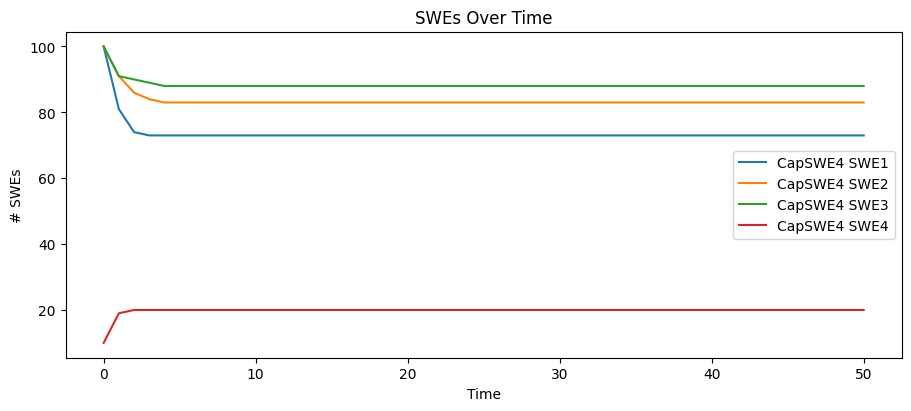

In [30]:
spec4 = """
HiringRate(0)

[Candidates] > SWE1(100) @ HiringRate
SWE1 > DepartedSWE1 @ Leak(0.1)
DepartedSWE1 > SWE1 @ Leak(0.5)

Candidates > SWE2(100) @ HiringRate
SWE1 > SWE2 @ Leak(0.1)
SWE2 > DepartedSWE2 @ Leak(0.1)
DepartedSWE2 > SWE1 @ Leak(0.5)

Candidates > SWE3(100) @ HiringRate
SWE2 > SWE3 @ Leak(0.1)
SWE3 > DepartedSWE3 @ Leak(0.1)
DepartedSWE3 > SWE2 @ Leak(0.5)

SWE4(10, 20)
Candidates > SWE4  @ HiringRate
SWE3 > SWE4 @ Leak(0.1)
SWE4 > DepartedSWE4 @ Leak(0.1)
DepartedSWE4 > SWE3 @ Leak(0.5)
"""

model4, results4 = results_for_spec(spec4, 50)
#combined1 = {'AtSameLevel': results1, 'BackfillN-1': results2 }
combined3 = {'CapSWE4': results4 }
chart('SWEs Over Time', 'Time', '# SWEs', ['SWE1', 'SWE2', 'SWE3', 'SWE4'], combined3)